<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Visualizations" data-toc-modified-id="Data-Visualizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualizations</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Create-dummy-variables" data-toc-modified-id="Create-dummy-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create dummy variables</a></span></li><li><span><a href="#Training-and-testing-data" data-toc-modified-id="Training-and-testing-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Training and testing data</a></span></li><li><span><a href="#Fit-in-training" data-toc-modified-id="Fit-in-training-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fit in training</a></span></li><li><span><a href="#Predict-in-testing" data-toc-modified-id="Predict-in-testing-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Predict in testing</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li></ul></li></ul></div>

__File Info:__

Date: 20181101

Author: Stephanie Langeland 

File Name: 10_logit_regression.ipynb

Version: 01

Previous Version/File: None

Dependencies: None

Purpose: Building A Logistic Regression in Python.

Input File(s): None

Output File(s): None

Required by: 
- A beginner's guide to Python.
- Tutorial: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Status: Complete

Machine: Dell Latitude - Windows 10

Python Version: Python 3

In [1]:
## import packages:
import pandas as pd

import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt 

plt.rc("font", size = 14) ## font size of the plot text

from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

import seaborn as sns

sns.set(style = "white") ## reset the default matplotlib parameters 

sns.set(style = "whitegrid", color_codes = True) ## seasbon style https://seaborn.pydata.org/tutorial/aesthetics.html

from sklearn import metrics

from sklearn.metrics import classification_report

# Data Prep

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [2]:
data_import = pd.read_csv(
    "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"
)

In [3]:
data_import.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data_import.shape

(41188, 21)

The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.

In [5]:
data_import.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

Detect and remove missing values:

In [6]:
null_count = data_import.isnull().sum()

null_count

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [7]:
na_count = data_import.isna().sum()

na_count

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no missing values.

Variables:

 - 	age (numeric)
 - 	job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
 - 	marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
 - 	education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
 - 	default: has credit in default? (categorical: “no”, “yes”, “unknown”)
 - 	housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
 - 	loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
 - 	contact: contact communication type (categorical: “cellular”, “telephone”)
 - 	month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
 - 	day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
 - 	duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
 - 	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 - 	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
 - 	previous: number of contacts performed before this campaign and for this client (numeric)
 - 	poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
 - 	emp.var.rate: employment variation rate — (numeric)
 - 	cons.price.idx: consumer price index — (numeric)
 - 	cons.conf.idx: consumer confidence index — (numeric)
 - 	euribor3m: euribor 3 month rate — (numeric)
 - 	nr.employed: number of employees — (numeric)
 - y: has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [8]:
data_import["education"].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”:

In [9]:
data_import["education"] = np.where(
    data_import["education"] == "basic.4y",
    "basic",
    data_import["education"]
)


data_import["education"] = np.where(
    data_import["education"] == "basic.9y",
    "basic",
    data_import["education"]
)


data_import["education"] = np.where(
    data_import["education"] == "basic.6y",
    "basic",
    data_import["education"]
)

In [10]:
data_import["education"].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data Exploration

Counts of y values:

In [11]:
data_import["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

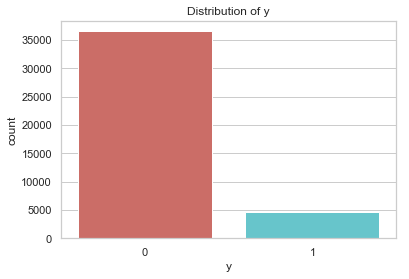

In [12]:
sns.countplot(
    x = "y",
    data = data_import,
    palette = "hls"
)

plt.title("Distribution of y");

Percentages of y values:

In [13]:
count_no_sub = len(
    data_import[data_import["y"] == 0] ## alone, this line will display the data frame subset for y = 0
)

count_sub = len(
    data_import[data_import["y"] == 1] ## alone, this line will display the data frame subset for y = 1
)


pct_no_sub = ( count_no_sub / (count_no_sub + count_sub) ) * 100

print(
    round(pct_no_sub, 2)
)

print("% of customers have not subscribed to term deposit.")

88.73
% of customers have not subscribed to term deposit.


In [14]:
pct_sub = ( count_sub / (count_no_sub + count_sub) ) * 100

print(
    round(pct_sub, 2)
)

print("% of customers have subscribed to term deposit.")

11.27
% of customers have subscribed to term deposit.


Average for each __numeric__ variable by Y = 0 or Y = 1:

In [15]:
data_import.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Average for education, marital status, and job category by each of their categories:

In [16]:
data_import.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [17]:
data_import.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [18]:
data_import.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


# Data Visualizations

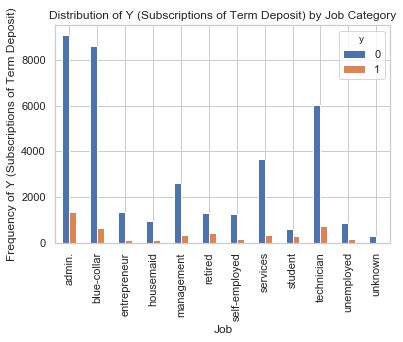

In [19]:
pd.crosstab(
    data_import.job,
    data_import.y
).plot(
    kind = "bar"
)

plt.title("Distribution of Y (Subscriptions of Term Deposit) by Job Category");

plt.xlabel("Job");

plt.ylabel("Frequency of Y (Subscriptions of Term Deposit)");

    Subscription rate greatly varies by job type.

In [20]:
table = pd.crosstab(
    data_import.marital,
    data_import.y
)

table

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


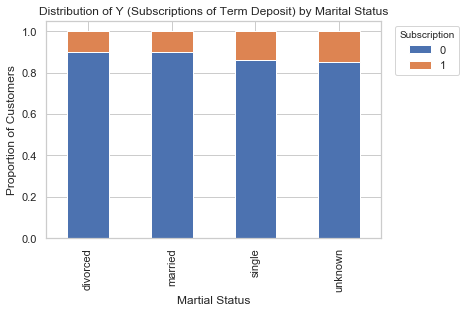

In [21]:
table.div(
    table.sum(1).astype(float),
    axis = 0
).plot(
    kind = "bar",
    stacked = True
);


plt.title("Distribution of Y (Subscriptions of Term Deposit) by Marital Status");

plt.xlabel("Martial Status");

plt.ylabel("Proportion of Customers");

plt.legend(
    loc = 'upper right', 
    bbox_to_anchor = (
        1.25, ## right (positive number) or left (negative number)
        1 ## up (positive number) or down (negative number)
    ),
    title = "Subscription"
);

In [22]:
edu_table = pd.crosstab(
    data_import.education,
    data_import.y
)

edu_table

y,0,1
education,,
basic,11424,1089
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


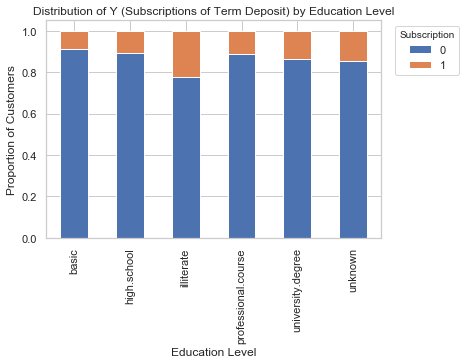

In [23]:
edu_table.div(
    edu_table.sum(1).astype(float),
    axis = 0
).plot(
    kind = "bar",
    stacked = True
);


plt.title("Distribution of Y (Subscriptions of Term Deposit) by Education Level");

plt.xlabel("Education Level");

plt.ylabel("Proportion of Customers");

plt.legend(
    loc = 'upper right', ## initial location of the legend
    bbox_to_anchor = ( ## to move the location of the legend right, left, up, or down
        1.25, ## right (positive number) or left (negative number)
        1 ## up (positive number) or down (negative number)
    ),
    title = "Subscription"
);

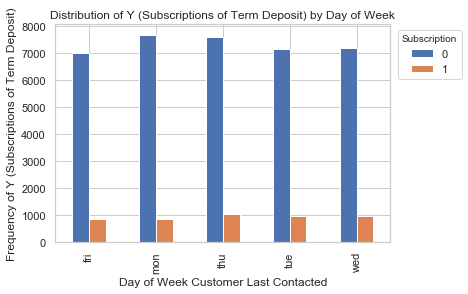

In [24]:
pd.crosstab(
    data_import.day_of_week,
    data_import.y
).plot(
    kind = "bar"
);

plt.title("Distribution of Y (Subscriptions of Term Deposit) by Day of Week");

plt.xlabel("Day of Week Customer Last Contacted");

plt.ylabel("Frequency of Y (Subscriptions of Term Deposit)");

plt.legend(
    loc = "upper right",
    bbox_to_anchor = (1.23, 1),
    title = "Subscription"
);

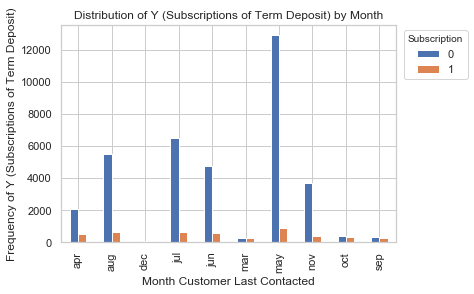

In [25]:
pd.crosstab(
    data_import.month,
    data_import.y
).plot(
    kind = "bar"
);

plt.title("Distribution of Y (Subscriptions of Term Deposit) by Month");

plt.xlabel("Month Customer Last Contacted");

plt.ylabel("Frequency of Y (Subscriptions of Term Deposit)");

plt.legend(
    loc = "upper right",
    bbox_to_anchor = (1.23, 1),
    title = "Subscription"
);

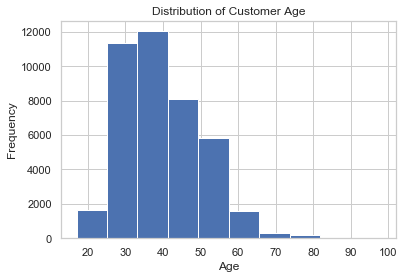

In [26]:
data_import.age.hist();

plt.title("Distribution of Customer Age");

plt.xlabel("Age");

plt.ylabel("Frequency");

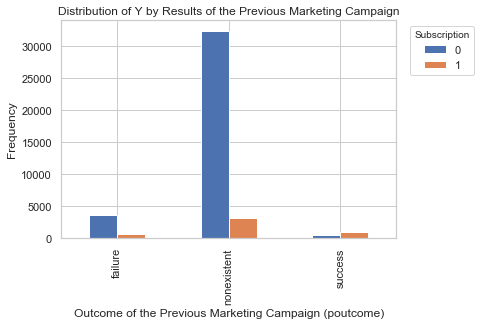

In [27]:
pd.crosstab(
    data_import.poutcome,
    data_import.y
).plot(
    kind = "bar"
);

plt.xlabel("Outcome of the Previous Marketing Campaign (poutcome)");

plt.ylabel("Frequency");

plt.title("Distribution of Y by Results of the Previous Marketing Campaign");

plt.legend(
    loc = "upper right",
    bbox_to_anchor = (1.25, 1),
    title = "Subscription"
);

# Logistic Regression

## Create dummy variables

In [28]:
data_dummies = data_import ## create a new copy of the data in order to avoid overwriting the old one in final 2 lines of the loop below

cat_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'poutcome'
]


for var in cat_vars:
    cat_list = 'var' + '_' + var ## concatenate existing variable name, "_", and level of that variable
    cat_list = pd.get_dummies( ## convert to dummy variables so each column (per the ^ naming convention) will have a 0/1 in it
        data_dummies[var], 
        prefix = var
    )
    data1 = data_dummies.join(cat_list) ## data1 will be a temporary item onto which we can add on the new columns
    data_dummies = data1 ## rename


data_vars = data_dummies.columns.values.tolist() ## list of new dummy variables

to_keep = [i for i in data_vars if i not in cat_vars] ## only keep if variable is in data_vars but not in cat_vars

data_final = data_dummies[to_keep] ## subset only variables that are listed in to_keep

data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

## Training and testing data

In [29]:
## subset X and y variables:
y = data_final["y"]

X = data_final.loc[
    :,
    data_final.columns != "y"
]

## split:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 123
)


## import logit fn:
logreg = LogisticRegression()

## Fit in training

In [30]:
logreg.fit(
    X_train, 
    y_train
)

C:\Users\stephanie.langeland\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Predict in testing

In [31]:
print(
    "The prediction accuracy of the logit model in testing is {:.2f}.".format(logreg.score(X_test, y_test))
)

The prediction accuracy of the logit model in testing is 0.91.


### Confusion Matrix

In [32]:
y_pred = logreg.predict(
    X_test
)



pd.crosstab(
    y_test,
    y_pred,
    rownames = ["Testing (Actual) Data"],
    colnames = ["Predictions"]
)

Predictions,0,1
Testing (Actual) Data,,
0,10687,267
1,845,558


In [33]:
print(
    classification_report(
        y_test,
        y_pred
    )
)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10954
           1       0.68      0.40      0.50      1403

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
- Support is the number of true instances for each label.

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html